<a href="https://colab.research.google.com/github/AymanMansur/Loan-Eligibility-Prediction-System/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




 **Importing the required librabries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer


**Importing the data files**

In [ ]:
#Mounting drive with colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CSE422 Project/loan_prediction.csv")

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Correlation Matrix**

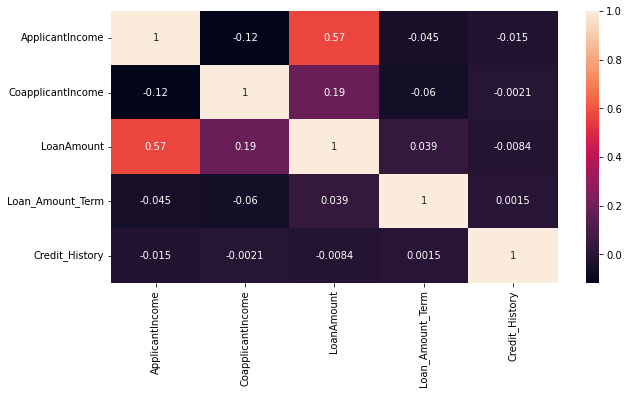

In [ ]:
corr_matrix = data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)

**Data preprocessing**

In [ ]:
#Removing the unwanted column
data.drop("Loan_ID",axis=1,inplace=True)

#Identifying the missing values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Filling the null values
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
#data.LoanAmount_log = data.LoanAmount.fillna(data.LoanAmount_log.mean())


In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Visualizing Data**

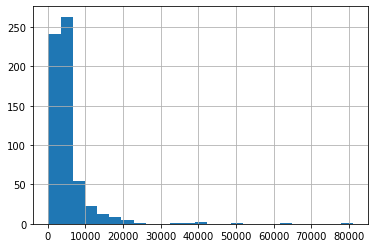

In [ ]:
data["ApplicantIncome"].hist(bins=25)

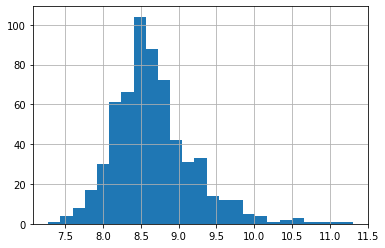

In [ ]:
#Normalizing "ApplicantIncome" as it is left skewed
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data["TotalIncome_log"] = np.log(data["TotalIncome"])
data["TotalIncome_log"].hist(bins=25)

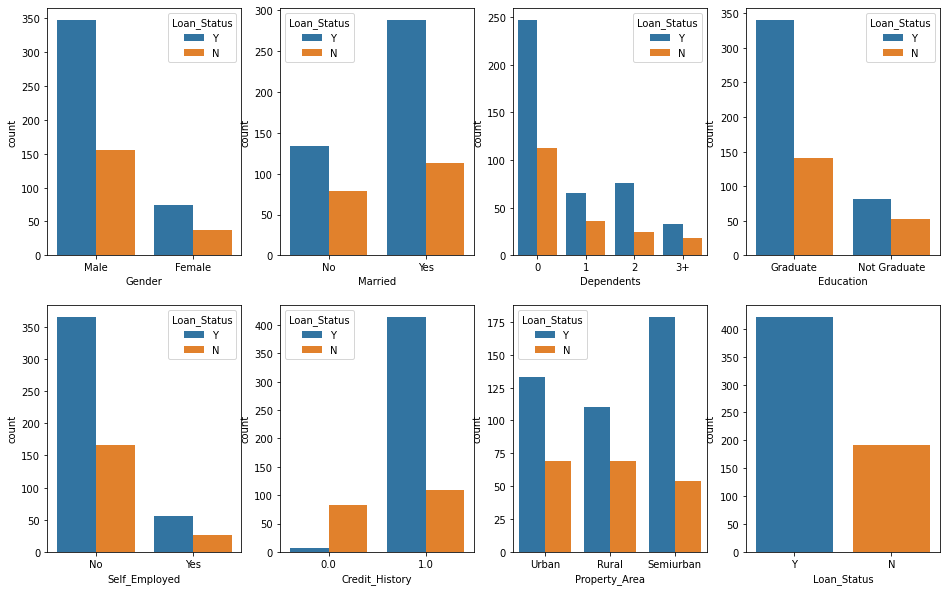

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x="Gender",hue="Loan_Status",data=data,ax=ax[0][0])
sns.countplot(x="Married",hue="Loan_Status",data=data,ax=ax[0][1])
sns.countplot(x="Dependents",hue="Loan_Status",data=data,ax=ax[0][2])
sns.countplot(x="Education",hue="Loan_Status",data=data,ax=ax[0][3])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=data,ax=ax[1][0])
sns.countplot(x="Credit_History",hue="Loan_Status",data=data,ax=ax[1][1])
sns.countplot(x="Property_Area",hue="Loan_Status",data=data,ax=ax[1][2])
sns.countplot(x="Loan_Status",data=data,ax=ax[1][3])


In [ ]:
#Label Enconding
data.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},
              'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
              'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data = data.replace(to_replace="3+", value=4)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515


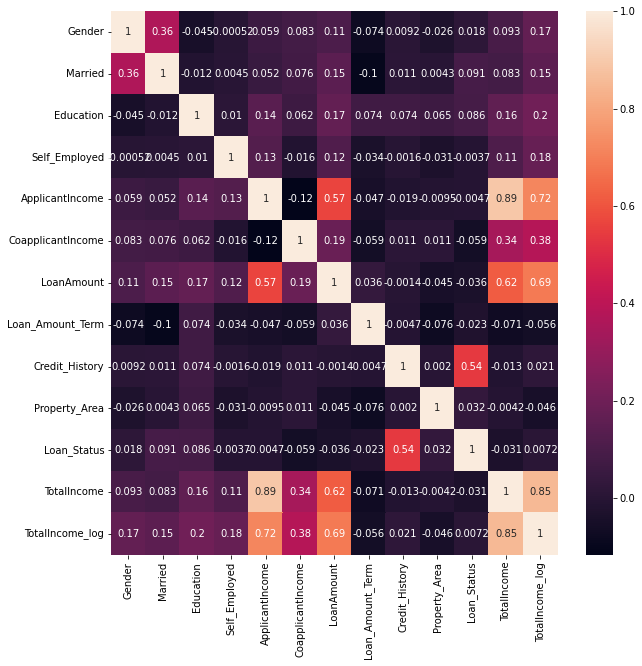

In [ ]:
corr_matrix = data.corr()
plt.figure(1, figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

**Creating train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Loan_Status"], axis=1)
Y = data["Loan_Status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(614, 13)
(429, 13)
(185, 13)


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

**MODEL TRAINING**

***Decision Tree Classifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)

Y_test_pred1 = model1.predict(X_test)
acc1 = accuracy_score(Y_test, Y_test_pred1)
print("Accuracy score of Decision Tree Classifier = ", acc1)

Accuracy score of Decision Tree Classifier =  0.7297297297297297


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_test_pred1)
print("The precision score is ", precision)

The precision score is  0.7730496453900709


***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression


model2 = LogisticRegression()
model2.fit(X_train, Y_train)

Y_test_pred2 = model2.predict(X_test)
acc2 = accuracy_score(Y_test, Y_test_pred2)
print("Accuracy score of Logistic Regression = ", acc2)

Accuracy score of Logistic Regression =  0.7945945945945946


***KNeighbor Classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)

Y_test_pred3 = model3.predict(X_test)
acc3 = accuracy_score(Y_test, Y_test_pred3)
print("Accuracy score of KNeighbor Classifier = ", acc3)

Accuracy score of KNeighbor Classifier =  0.8108108108108109


***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(X_train, Y_train)

Y_test_pred4 = model4.predict(X_test)
acc4 = accuracy_score(Y_test, Y_test_pred4)
print("Accuracy score of Naive Bayes = ", acc4)

Accuracy score of Naive Bayes =  0.7945945945945946


***Support Vector Machine***

In [ ]:
from sklearn import svm

model5 = svm.SVC(kernel="linear")
model5.fit(X_train, Y_train)

Y_test_pred5 = model5.predict(X_test)
acc5 = accuracy_score(Y_test, Y_test_pred5)
print("Accuracy score of Support Vector Machine = ", acc5)

Accuracy score of Support Vector Machine =  0.8


**Model selection and comparison analysis**

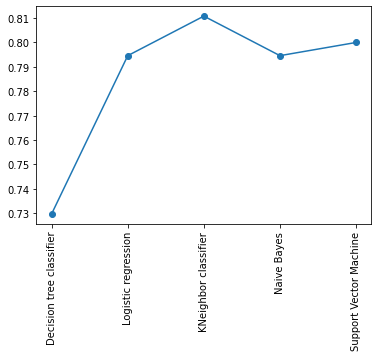

In [ ]:
models = ["Decision tree classifier", "Logistic regression",
          "KNeighbor classifier", "Naive Bayes", "Support Vector Machine"]
accuracy = [acc1, acc2, acc3, acc4, acc5]
plt.scatter(models,accuracy)
plt.plot(models,accuracy)
plt.xticks(rotation = 90)
plt.show()


***Confusion matrix for Decision tree classifier***



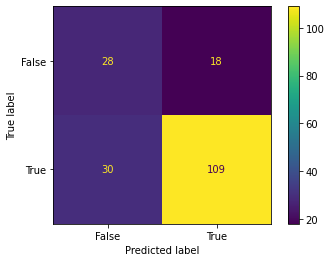

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test_pred1, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


***Confusion matrix for Logistic regression***

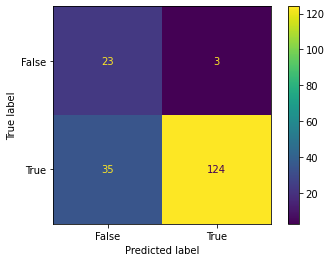

In [ ]:
cm = metrics.confusion_matrix(Y_test_pred2, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

***Confusion matrix for KNeighbor Classifier***

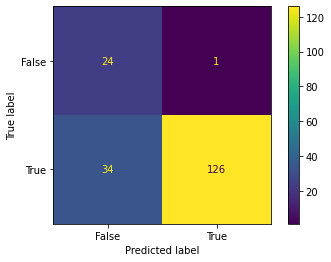

In [ ]:
cm = metrics.confusion_matrix(Y_test_pred3, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

***Confusion matrix for Naive Bayes***

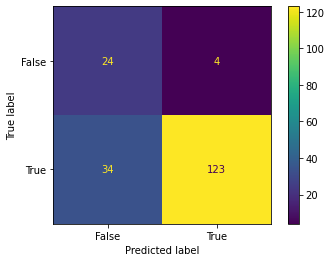

In [ ]:
cm = metrics.confusion_matrix(Y_test_pred4, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

***Confusion matrix for Support Vector Machine***

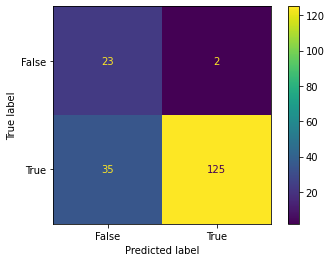

In [ ]:
cm = metrics.confusion_matrix(Y_test_pred5, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()